All B neighbors: ['A', 'C']


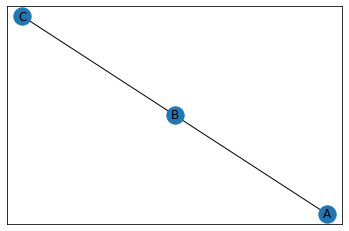

In [1]:
import networkx as nx 
%matplotlib inline
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('B', 'C')

# Draw Graph
print(f'All B neighbors: {list(G.neighbors("B"))}')

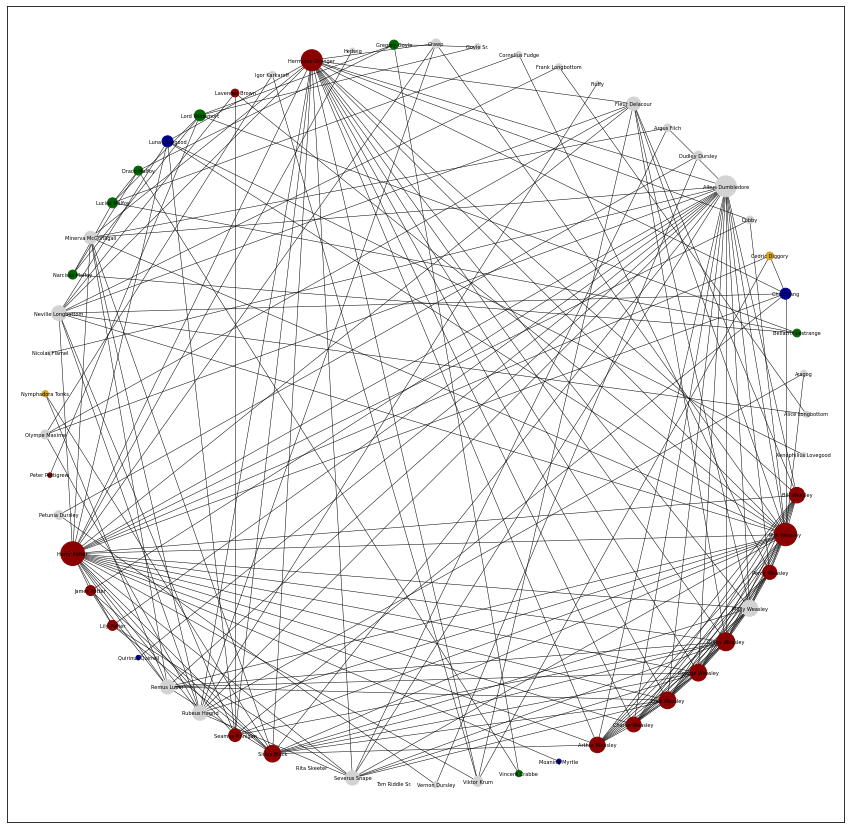

In [4]:
import pandas as pd
import networkx as nx 
%matplotlib inline

# Load Nodes to graph
nodes = pd.read_json('clean_characters.json')
G = nx.Graph()
nodes_tuples = [(node['Name'], node) for index, node in nodes.iterrows()]
G.add_nodes_from(nodes_tuples)
# print(nodes[['Name', 'School', 'house']].sort_values(by=['School', 'house']))
# Load Edges
edges = pd.read_csv('cleanRelations.csv')
for index, edge in edges.iterrows():  # mark edge in green if the relation is friends, else mark in red (enemies)
    if edge[2] == '+':
        G.add_edge(edge[0], edge[1], sign=edge[2], color='black')

### Draw graph
## draw without any specific layout
# nx.draw_networkx(G)

## draw circular layout
# nx.draw_networkx(G, nx.circular_layout(G), font_size=3, node_size=70, width=1)

## 
import matplotlib.pyplot as plt
node_size = [G.degree(v) * 20 for v in G] # Size will be the degree
plt.figure(3,figsize=(15,15)) # Make canvas bigger for better understanding

## Color nodes in house colors
house_colors = {'Slytherin':'darkgreen', 'Ravenclaw':'darkblue', 'Hufflepuff':'goldenrod','Gryffindor': 'darkred', 'other':'lightgray'}
node_color = [house_colors[character['house']] if character['house'] in house_colors else house_colors['other'] for name, character in G.nodes(data=True) ]

## color edges
colors = nx.get_edge_attributes(G,'color').values()

## draw graph
nx.draw_networkx(G, nx.circular_layout(G), font_size=5, width=0.5, edge_color=colors, node_size=node_size, node_color=node_color)
